In [ ]:
import numpy as np  # Import numpy for handling arrays and performing numerical operations
# Importing modules from TensorFlow Keras to build a sequential model
from tensorflow.keras.models import Sequential  # Used for creating a linear stack of neural network layers
from tensorflow.keras.layers import LSTM  # Layer used for processing sequences of data in RNNs (Recurrent Neural Networks)
from tensorflow.keras.layers import Dense  # Basic fully connected neural network layer
from tensorflow.keras.layers import Flatten  # Layer that flattens the input, converting it into a 1D array for Dense layers
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X ,y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]] [146 158 172 187 196 210]


In [ ]:
X.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss=MeanSquaredError())
# fit model
model.fit(X, y, epochs=300, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 31930.5234
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31809.6738
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 31690.2656
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 31572.4043
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 31455.0020
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 31335.9121
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 31209.7637
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 31075.1777
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 30929.8379
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 30772.0918
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 30600.4121
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 30413.1230
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 30208.4629
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 29984.2949
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

In [ ]:
import numpy as np

# demonstrate prediction for next 10
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0

while i < 10:
    if len(temp_input) > 3:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

# Print only the final output list
print("Final list output:", lst_output)

Final list output: [223.63326, 233.8565, 247.2198, 259.8168, 271.02615, 284.18164, 296.70453, 308.87674, 322.28024, 335.33517]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
# Convert each value to an integer
next10_series_data = [int(val) for val in lst_output]
next10_series_data

[223, 233, 247, 259, 271, 284, 296, 308, 322, 335]

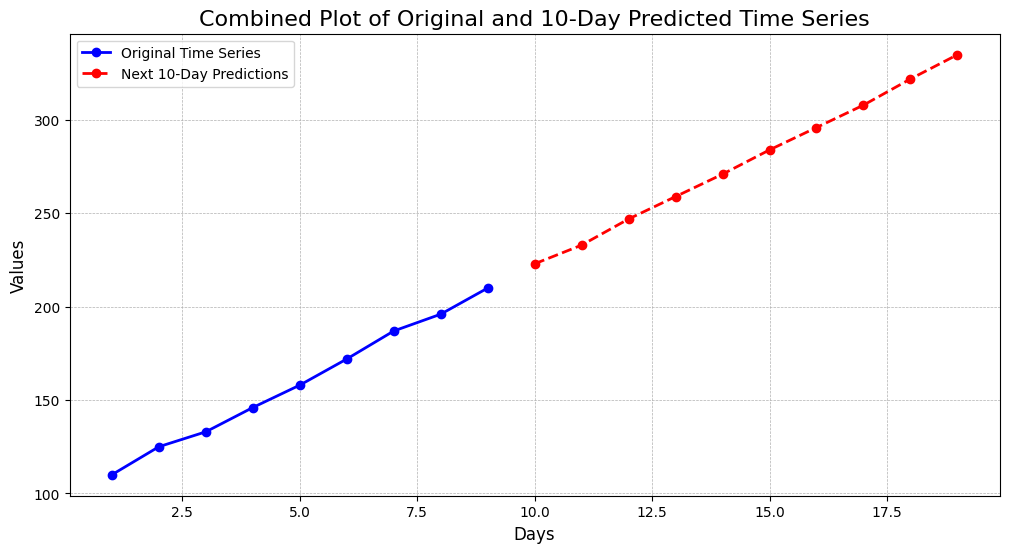

In [ ]:
import matplotlib.pyplot as plt
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the original time series data
plt.plot(day_new, timeseries_data, label="Original Time Series", marker='o', color='blue', linewidth=2)

# Plot the next 10 days' predicted data
plt.plot(day_pred, next10_series_data, label="Next 10-Day Predictions", marker='o', color='red', linestyle='--', linewidth=2)

# Add titles and labels
plt.title("Combined Plot of Original and 10-Day Predicted Time Series", fontsize=16)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Add grid for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend for clarity
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Save the trained model to an HDF5 file
model.save('rnn_lstm_model.h5')